<a href="https://colab.research.google.com/github/khakhiD/ML/blob/main/Doraemon_Classification/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

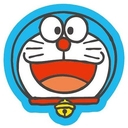
# **ÎèÑÎùºÏóêÎ™Ω Ï∞æÍ∏∞ üëÄ**
---
>**‚ö° Î®∏Ïã†Îü¨Îãù ÌîÑÎ°úÍ∑∏ÎûòÎ∞ç (Ïù¥Ï∞ΩÏó¥ ÍµêÏàòÎãò) Í∏∞Îßê Í≥ºÏ†ú ‚ö°**
- ÎèÑÎùºÏóêÎ™Ω Ïù¥ÎØ∏ÏßÄÏôÄ Îã®Ìå•Îπµ Ïù¥ÎØ∏ÏßÄ Ï§ë, ÎèÑÎùºÏóêÎ™ΩÏùÑ Ï∞æÎäî Î™®Îç∏ÏùÑ Íµ¨ÏÑ±ÌïòÍ≥†, ÌÖåÏä§Ìä∏ÌïòÍ∏∞
-  **ResNet50** Pre-trained modelÏùÑ ÌôúÏö©ÌïòÏó¨ Ï†ÑÏù¥ ÌïôÏäµÌïòÍ∏∞  


### **Ï∞∏Ïó¨Ïûê**
---
>- Ïã†ÎèôÌò∏, ÍπÄÌÉúÍ∑º, ÌóàÏ†ïÌòÑ, ÏÑúÌòúÏú∞


### **Í≥ºÏ†ï**
---


>- Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
- Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
- Î™®Îç∏ Íµ¨ÏÑ±
- Î™®Îç∏ ÌïôÏäµ
- ÌÖåÏä§Ìä∏

### **Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞**


In [8]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread
from skimage.transform import resize
from PIL import Image

from keras.preprocessing.image import img_to_array, load_img
from keras.applications.resnet import preprocess_input
from keras.applications.resnet import ResNet50
from keras import models, layers
from keras.models import Model

---
- ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨Îì§ÏùÑ Import Í≥ºÏ†ïÏûÖÎãàÎã§.
KerasÏùò **ResNet50** Î™®Îç∏Ïù¥ ÌïµÏã¨ÏûÖÎãàÎã§.

In [1]:
# Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Î°≠Ïö© Ìï®Ïàò
"""
  Î≥∏ Î¨∏ÏÑúÏóêÏÑú ÌôúÏö©ÌïòÎäî Îç∞Ïù¥ÌÑ∞Îäî Ïù¥ÎØ∏ ÏïÑÎûò Ìï®ÏàòÍ∞Ä Ï†ÅÏö©ÎêòÏóàÏäµÎãàÎã§.
"""
import os, sys

def resize_and_crop(img_path, modified_path, size, crop_type='middle'):
    files = os.listdir(img_path)
    for file in files: 
        name = str(file)
        os.chdir(img_path)
        img = Image.open(file)
        img_ratio = img.size[0] / float(img.size[1])
        ratio = size[0] / float(size[1])
        
        if ratio > img_ratio:
            img = img.resize((size[0], int(round(size[0] * img.size[1] / img.size[0]))),
                Image.ANTIALIAS)     
            if crop_type == 'top':
                box = (0, 0, img.size[0], size[1])
            elif crop_type == 'middle':
                box = (0, int(round((img.size[1] - size[1]) / 2)), img.size[0],
                    int(round((img.size[1] + size[1]) / 2)))
            elif crop_type == 'bottom':
                box = (0, img.size[1] - size[1], img.size[0], img.size[1])
            else :
                raise ValueError('ERROR: invalid value for crop_type')
            img = img.crop(box)
            
        elif ratio < img_ratio:
            img = img.resize((int(round(size[1] * img.size[0] / img.size[1])), size[1]),
                Image.ANTIALIAS)
            if crop_type == 'top':
                box = (0, 0, size[0], img.size[1])
            elif crop_type == 'middle':
                box = (int(round((img.size[0] - size[0]) / 2)), 0,
                    int(round((img.size[0] + size[0]) / 2)), img.size[1])
            elif crop_type == 'bottom':
                box = (img.size[0] - size[0], 0, img.size[0], img.size[1])
            else :
                raise ValueError('ERROR: invalid value for crop_type')
            img = img.crop(box)
            
        else :
            img = img.resize((size[0], size[1]), Image.ANTIALIAS)
            
        os.chdir(modified_path)
        img.save(name, "png")

---
- Ïù¥ÎØ∏ÏßÄ ÌÅ¨Î°≠/Î¶¨ÏÇ¨Ïù¥ÏßïÏö© Ìï®ÏàòÏûÖÎãàÎã§.
- ÏÇ¨Ïö©Ìï† Ïª§Ïä§ÌÖÄ Îç∞Ïù¥ÌÑ∞Îäî ÌååÏù¥Ïç¨ ÏõπÏä§ÌÅ¨ÎûòÌïëÏùÑ ÌÜµÌï¥ Íµ¨ÏÑ±ÌïòÏòÄÍ∏∞ ÎïåÎ¨∏Ïóê, Í∞Å Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞Í∞Ä Ï†úÍ∞ÅÍ∞ÅÏù¥ÏóàÏäµÎãàÎã§.
- GithubÏóê ÏóÖÎ°úÎìúÎêòÏñ¥ Î≥∏Î¨∏Ïóê ÏÇ¨Ïö©ÎêòÎäî Îç∞Ïù¥ÌÑ∞Îäî Ïù¥ÎØ∏ Ìï¥Îãπ Ìï®ÏàòÎ•º ÌÜµÌï¥ ÌÅ¨Î°≠Îêú Ïù¥ÎØ∏ÏßÄÏûÖÎãàÎã§.

In [10]:
# Ïù¥ÎØ∏ÏßÄ Î∞∞Ïó¥ ÌôïÏù∏Ïö© Ìï®Ïàò - ÏòàÏ†ú Ìï®Ïàò Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])

ÌõàÎ†®Ïö© ÎèÑÎùºÏóêÎ™Ω, Îã®Ìå•Îπµ Ïù¥ÎØ∏ÏßÄ (30Ïû•, ÏÇ¨Ïù¥Ï¶à=(100,100))


<Figure size 432x288 with 0 Axes>

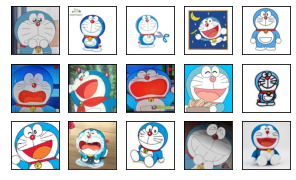

<Figure size 432x288 with 0 Axes>

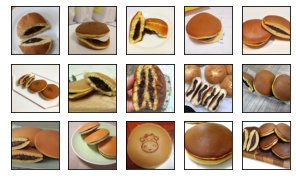

In [33]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞: 15Ïû•Ïùò ÎèÑÎùºÏóêÎ™Ω Ïù¥ÎØ∏ÏßÄ + 15Ïû•Ïùò Îã®Ìå•Îπµ Ïù¥ÎØ∏ÏßÄ
import urllib.request

doraemon_images = []
dorayaki_images = []

url = 'https://github.com/khakhiD/ML/raw/main/data/'

for i in range(15):
  urllib.request.urlretrieve(url+'doraemon/doraemon%20({}).jpg'.format(i+1),
                             "doraemon{}.jpg".format(i+1))
  img = Image.open("doraemon{}.jpg".format(i+1)).convert('RGB')
  img = img.resize((100,100))
  img = np.asarray(img)
  doraemon_images.append(img)

for i in range(15):
  urllib.request.urlretrieve(url+'dorayaki/dorayaki%20({}).jpg'.format(i+1),
                             "dorayaki{}.jpg".format(i+1))
  img = Image.open("dorayaki{}.jpg".format(i+1)).convert('RGB')
  img = img.resize((100,100))
  img = np.asarray(img)
  dorayaki_images.append(img)

print("ÌõàÎ†®Ïö© ÎèÑÎùºÏóêÎ™Ω, Îã®Ìå•Îπµ Ïù¥ÎØ∏ÏßÄ (30Ïû•, ÏÇ¨Ïù¥Ï¶à=(100,100))")
plot_images(3,5, doraemon_images)
plot_images(3,5, dorayaki_images)

In [34]:
print(len(doraemon_images))
print(len(dorayaki_images))

15
15


---
- ÌôúÏö©Ìï† Îç∞Ïù¥ÌÑ∞Î•º Github(https://github.com/khakhiD/ML/tree/main/data) Ïóê ÏóÖÎ°úÎìúÌïòÏòÄÏäµÎãàÎã§.
- ÌõàÎ†®Ïö© Îç∞Ïù¥ÌÑ∞Ïù∏ 15Ïû•Ïùò ÎèÑÎùºÏóêÎ™Ω Ïù¥ÎØ∏ÏßÄÏôÄ 15Ïû•Ïùò Îã®Ìå•Îπµ Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏôÄ Í∞Å Î∞∞Ïó¥Ïóê Ï†ÄÏû•Ìï©ÎãàÎã§.
- Î™®Îç∏ ÌõàÎ†®ÏùÑ ÏúÑÌï¥ ÏÇ¨Ïö©Ìï† Image shapeÏùÄ (100,100,3)Ïù¥ÎØÄÎ°ú, Ïù¥ÎØ∏ÏßÄÎ•º resize Ìï¥Ï§çÎãàÎã§.
- **‚úÖ PIL ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÌôúÏö©ÌïòÏó¨ Î™®Îì† Ïù¥ÎØ∏ÏßÄÎ•º 'RGB'Î°ú ÎßûÏ∂îÏóàÏäµÎãàÎã§.**

### **Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨**

In [35]:
# Training Set Íµ¨ÏÑ±ÌïòÍ∏∞
X = doraemon_images + dorayaki_images
y = [[1]]*len(doraemon_images) + [[0]]*len(dorayaki_images)

X = np.array(X)
y = np.array(y)
X = preprocess_input(X)

print(X.shape, y.shape)

(30, 100, 100, 3) (30, 1)


---
- XÏóê ÎèÑÎùºÏóêÎ™Ω Ïù¥ÎØ∏ÏßÄÏôÄ Îã®Ìå•Îπµ Ïù¥ÎØ∏ÏßÄÎ•º Î∂ôÏó¨ ÎÑ£Ïñ¥Ï§çÎãàÎã§.
- yÎäî ÎèÑÎùºÏóêÎ™Ω Ïù¥ÎØ∏ÏßÄÏù∏ Í≤ΩÏö∞ 1, Îã®Ìå•Îπµ Ïù¥ÎØ∏ÏßÄÏùº Í≤ΩÏö∞ 0Ïù∏ Ïù¥ÏßÑ ÌòïÌÉúÎ°ú Íµ¨ÏÑ±Ìï¥Ï§çÎãàÎã§.
- XÏôÄ yÎ•º ÎÑòÌååÏù¥ Î∞∞Ïó¥Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
- keras.applications.resnetÏùò **preprocess_input Ìï®Ïàò**Î°ú **ResNet Ï†ÑÏö© Ï†ÑÏ≤òÎ¶¨**Î•º Ìï¥Ï§çÎãàÎã§.

### **Î™®Îç∏ Íµ¨ÏÑ±**

---
- Í∏∞ÌïôÏäµ(pre-trained) Î™®Îç∏Ïóê Ïö∞Î¶¨Í∞Ä ÏÇ¨Ïö©Ìï† Î†àÏù¥Ïñ¥Î•º Ï∂îÍ∞ÄÌïòÏó¨ Î™®Îç∏ÏùÑ Íµ¨ÏÑ±ÌïòÎäî Í≥ºÏ†ïÏûÖÎãàÎã§.

In [36]:
# ResNet50Ïùò ImageNet Í∞ÄÏ§ëÏπòÎ•º Í∞ÄÏßÄÍ≥† ÏûàÎäî Î™®Îç∏ÏùÑ Ï†ÑÏù¥ÌïôÏäµÏúºÎ°ú ÏÇ¨Ïö©

input_layer = layers.Input(shape=(100,100,3))
base_model = ResNet50(weights='imagenet', input_tensor=input_layer, include_top=False)
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']      

---
- imagenet Í∞ÄÏ§ëÏπòÍ∞Ä ÌïôÏäµÎêú ResNet50 Î™®Îç∏Ïùò Î†àÏù¥Ïñ¥ Íµ¨ÏÑ±ÏûÖÎãàÎã§.
- include_topÏùÑ FalseÎ°ú Ï£ºÏñ¥, ÏÇ¨Ï†ÑÌïôÏäµ Î™®Îç∏Ïùò ÏµúÏÉÅÏ∏µ Î∂ÑÎ•òÍ∏∞Î•º ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÎèÑÎ°ù ÏÑ§Ï†ïÌï©ÎãàÎã§.
- Ìï¥Îãπ Î™®Îç∏ Î†àÏù¥Ïñ¥ Íµ¨ÏÑ± Îã§ÏùåÏóê Îì§Ïñ¥Í∞à Î†àÏù¥Ïñ¥Î•º Íµ¨ÏÑ±ÌïòÏó¨ Î∂ôÏó¨Ï§Ñ Í≤ÉÏûÖÎãàÎã§.

In [37]:
# Freeze ÌïòÍ∏∞
for layer in base_model.layers[:-1]:
  layer.trainable = False

# Îã§Ïùå Î†àÏù¥Ïñ¥ Íµ¨ÏÑ±ÌïòÍ∏∞
last_layer = base_model.output
flatten_layer = layers.Flatten()(last_layer)
dense_layer = layers.Dense(256, activation='relu')(flatten_layer)
dense_layer = layers.Dense(256, activation='relu')(dense_layer)
output_layer = layers.Dense(1, activation='sigmoid')(dense_layer)

# ResNet Î™®Îç∏Í≥º Íµ¨ÏÑ±Ìïú Î™®Îç∏ Î∂ôÏù¥Í∏∞
Dora_model = Model(inputs=input_layer, outputs=output_layer)
Dora_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']       

---
- Í∏∞Ï°¥ ResNet Î™®Îç∏ Î†àÏù¥Ïñ¥ Ïù¥ÌõÑ Flatten, Dense, Dense, Dense Î†àÏù¥Ïñ¥Í∞Ä Ï∂îÍ∞ÄÎêòÏóàÏäµÎãàÎã§.
- Ïù¥ÎØ∏ÏßÄÍ∞Ä ÎèÑÎùºÏóêÎ™Ω Ïù¥ÎØ∏ÏßÄÏù∏ÏßÄ Îã®Ìå•Îπµ Ïù¥ÎØ∏ÏßÄÏù∏ÏßÄ Ïù¥ÏßÑ Î∂ÑÎ•òÌï† Í≤ÉÏù¥ÎØÄÎ°ú, ÎßàÏßÄÎßâ Dense LayerÏóê **Sigmoid Ìï®Ïàò**Î•º Ï†ÅÏö©ÌïòÏó¨ ÏûÖÎ†• Í∞íÏùÑ 0 ÎòêÎäî 1Î°ú Î≥ÄÌòïÌïòÏó¨ Ï∂úÎ†•Ìï©ÎãàÎã§.


In [39]:
Dora_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
print("\'Dora_model\' has been compiled.")

'Dora_model' has been compiled.


---
- Í∏∞Ï°¥ ÏòàÏ†úÏôÄ Í∞ôÏù¥ ÏÜêÏã§Ìï®ÏàòÎäî Mean Squared Error, ÌôúÏÑ±Ìôî Ìï®ÏàòÎäî AdamÏúºÎ°ú ÏÑ§Ï†ïÌïòÏó¨ Ïª¥ÌååÏùºÌï©ÎãàÎã§.

###**Î™®Îç∏ ÌïôÏäµ**

In [40]:
# Íµ¨ÏÑ±Ìïú Î™®Îç∏Í≥º Îç∞Ïù¥ÌÑ∞Î°ú Ïù¥ÎØ∏ÏßÄÎ•º ÌïôÏäµ
history = Dora_model.fit(X, y, epochs=50, shuffle=True)

Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.2105 - accuracy: 0.7333
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 0.0035 - accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/50
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/50
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/50
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 11/50
1/1 [

---
- Îç∞Ïù¥ÌÑ∞Í∞Ä ordered (1111...0000...) ÎêòÏñ¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê shuffle=TrueÎ•º Ï£ºÏñ¥ Î™®Îç∏ÏùÑ ÌïôÏäµÌï©ÎãàÎã§.

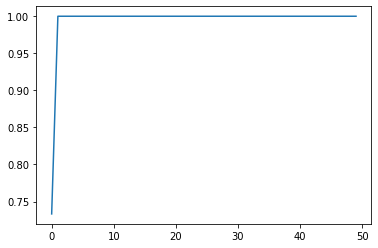

In [41]:
plt.plot(history.history['accuracy'])

###**ÌÖåÏä§Ìä∏**

---
- Î®ºÏ†Ä, **ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄÏÖãÏùÑ Íµ¨ÏÑ±**Ìï©ÎãàÎã§.
- Ï¥ù 10Ïû•Ïùò ÌÖåÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄÏÖãÏùÄ ÎèÑÎùºÏóêÎ™Ω Ïù¥ÎØ∏ÏßÄ 5Ïû•, Îã®Ìå•Îπµ Ïù¥ÎØ∏ÏßÄ 5Ïû•ÏúºÎ°ú Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.


<Figure size 432x288 with 0 Axes>

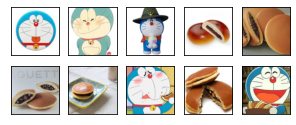

In [27]:
# ÌÖåÏä§Ìä∏Ïö© Ïù¥ÎØ∏ÏßÄ 10Ïû•ÏùÑ Íµ¨ÏÑ±

test_images = []

url = 'https://github.com/khakhiD/ML/raw/main/data/test/emon_or_yaki/'

for i in range(10):
  urllib.request.urlretrieve(url+'doratest%20({}).jpg'.format(i+1), "doratest{}.jpg".format(i+1))
  img = Image.open("doratest{}.jpg".format(i+1)).convert('RGB')
  img = img.resize((100,100))
  img = np.asarray(img)
  test_images.append(img)

test_images = np.array(test_images)
plot_images(2,5, test_images)

---
- ÌÖåÏä§Ìä∏ ÏÖãÏùò Ï†ïÎãµÏùÄ **[1,1,1,0,0,0,0,1,0,1]**Ïù¥ Îê† Í≤ÉÏûÖÎãàÎã§.

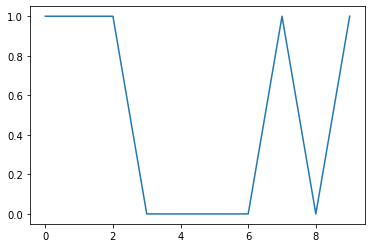

In [44]:
# ÏòàÏ∏°ÌïòÍ∏∞

test_result = Dora_model.predict(test_images)
plt.plot(test_result)

---
- Ï†ïÎãµÍ≥º ÏùºÏπòÌïòÎäî Í≤∞Í≥ºÍ∞Ä ÎÇòÏôîÏäµÎãàÎã§.

<Figure size 432x288 with 0 Axes>

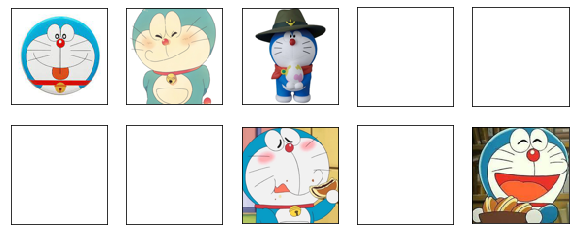

In [43]:
# ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôîÌïòÍ∏∞

fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j] > 0.5:            
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')

---
- ÎèÑÎùºÏóêÎ™Ω Ïù¥ÎØ∏ÏßÄÎßåÏùÑ Ï∞æÏïÑÎÇ¥ÏóàÏäµÎãàÎã§.